In [3]:
%pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("/workspaces/TSCDIA-/proyecto_integrador/tp/brazilian_ecommerce.csv")

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118146.000000,119143.000000,119140.000000,119140.000000,119140.000000
mean,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,4.015582,35033.451298,1.094737,2.941246,172.735135
std,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,1.400436,29823.198969,0.730141,2.777848,267.776077
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1003.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,11250.000000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,24240.000000,1.000000,2.000000,108.160000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,58475.000000,1.000000,4.000000,189.240000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99990.000000,29.000000,24.000000,13664.080000


In [5]:
for col in df.columns:
    valores_unicos = df[col].unique()
    print(f"Columna '{col}': {len(valores_unicos)} valores únicos")
    print(f"Valores: {valores_unicos}")
    print("-" * 80)

Columna 'order_id': 99441 valores únicos
Valores: ['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f07b62' '66dea50a8b16d9b4dee7af250b4be1a5']
--------------------------------------------------------------------------------
Columna 'customer_id': 99441 valores únicos
Valores: ['9ef432eb6251297304e76186b10a928d' 'b0830fb4747a6c6d20dea0b8c802d7ef'
 '41ce2a54c0b03bf3443c3d931a367089' ... '1aa71eb042121263aafbe80c1b562c9c'
 'b331b74b18dc79bcdf6532d51e1637c1' 'edb027a75a1449115f6b43211ae02a24']
--------------------------------------------------------------------------------
Columna 'order_status': 8 valores únicos
Valores: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
--------------------------------------------------------------------------------
Columna 'order_purchase_timestamp': 98875 valores únicos
Valores: ['2017-

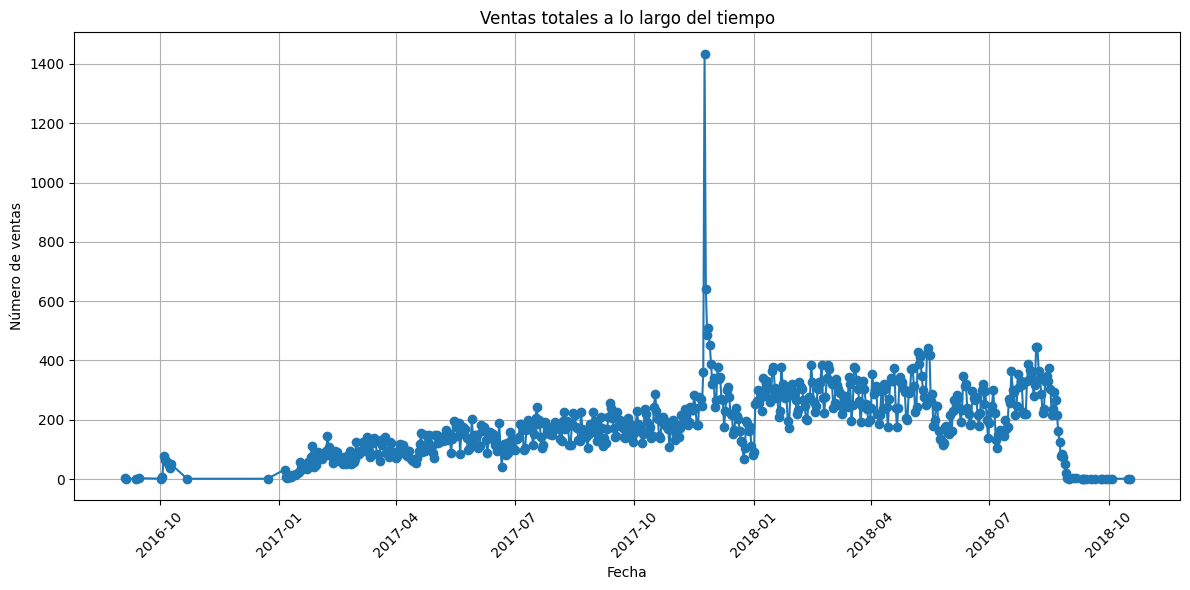

In [6]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp']) 

df['date'] = df['order_purchase_timestamp'].dt.date

ventas_por_fecha = df.groupby('date').size().reset_index(name='ventas')

plt.figure(figsize=(12, 6)) 
plt.plot(ventas_por_fecha['date'], ventas_por_fecha['ventas'], marker='o', linestyle='-') 
plt.title('Ventas totales a lo largo del tiempo') 
plt.xlabel('Fecha') 
plt.ylabel('Número de ventas') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout() 
plt.show()

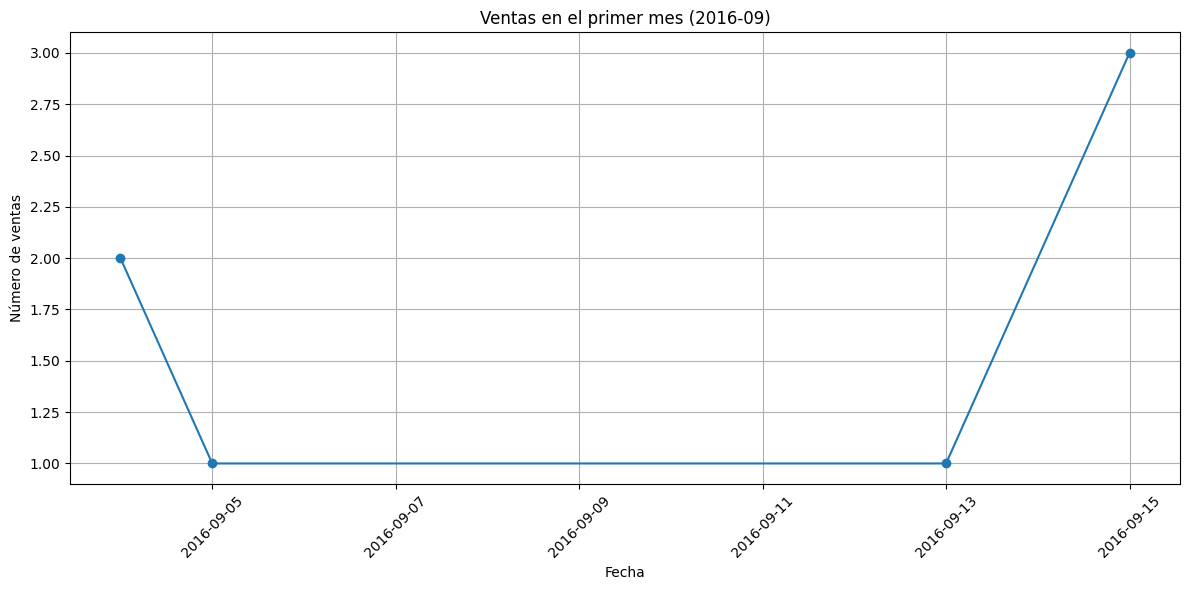

In [7]:
primer_mes = df['order_purchase_timestamp'].dt.to_period('M').min() 

df_primer_mes = df[df['order_purchase_timestamp'].dt.to_period('M') == primer_mes]

ventas_primer_mes = df_primer_mes.groupby('date').size().reset_index(name='ventas')

plt.figure(figsize=(12, 6)) 
plt.plot(ventas_primer_mes['date'], ventas_primer_mes['ventas'], marker='o', linestyle='-') 
plt.title(f'Ventas en el primer mes ({primer_mes})') 
plt.xlabel('Fecha') 
plt.ylabel('Número de ventas') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout() 
plt.show()

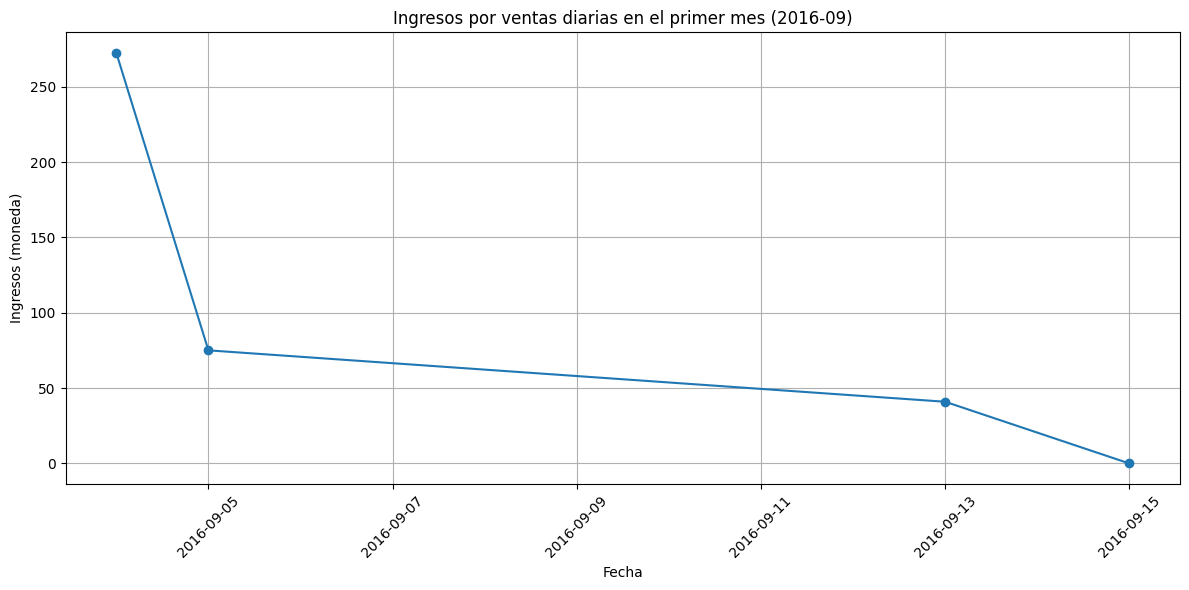

In [8]:

ingresos_primer_mes = df['order_purchase_timestamp'].dt.to_period('M').min()

ingresos_primer_mes = df_primer_mes.groupby('date')['payment_value'].sum().reset_index(name='ingresos')

plt.figure(figsize=(12, 6)) 
plt.plot(ingresos_primer_mes['date'], ingresos_primer_mes['ingresos'], marker='o', linestyle='-') 
plt.title(f'Ingresos por ventas diarias en el primer mes ({primer_mes})') 
plt.xlabel('Fecha') 
plt.ylabel('Ingresos (moneda)') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout() 
plt.show()

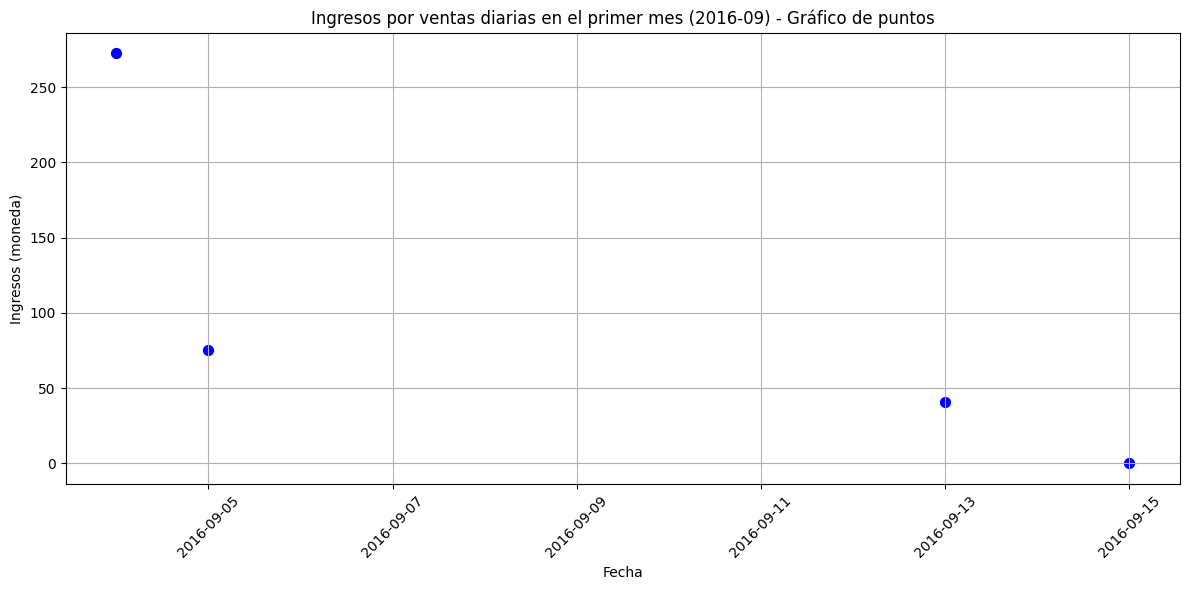

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(ingresos_primer_mes['date'], ingresos_primer_mes['ingresos'],  color='blue', s=50) # type: ignore
plt.title(f'Ingresos por ventas diarias en el primer mes ({primer_mes}) - Gráfico de puntos')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (moneda)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

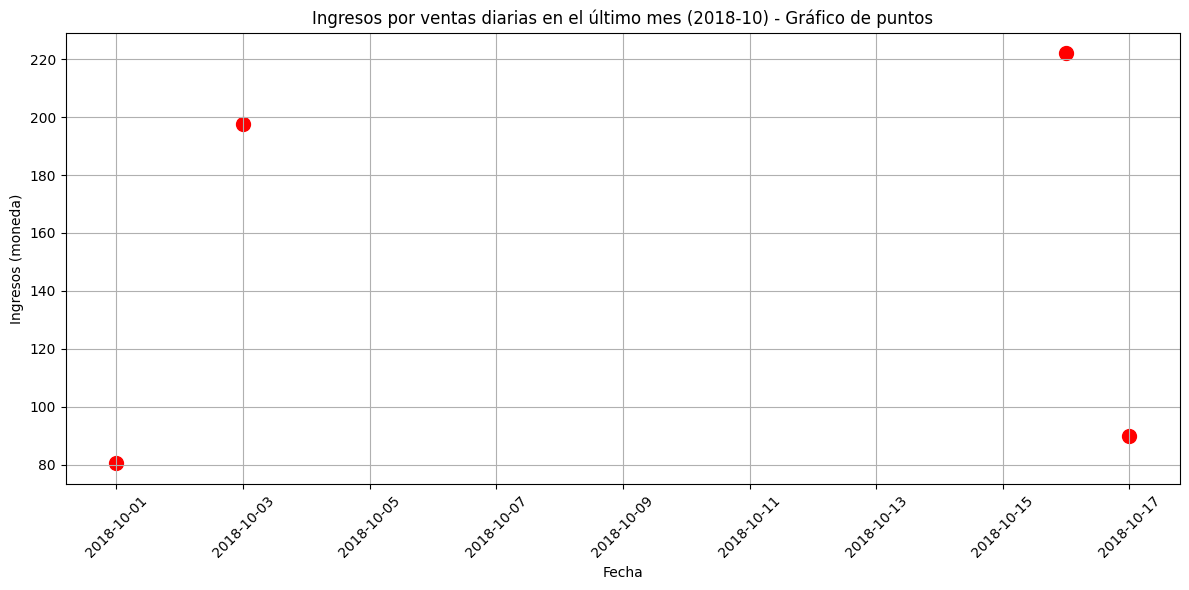

In [10]:
ultimo_mes = df['order_purchase_timestamp'].dt.to_period('M').max()
df_ultimo_mes = df[df['order_purchase_timestamp'].dt.to_period('M') == ultimo_mes]

ingresos_ultimo_mes = df_ultimo_mes.groupby('date')['payment_value'].sum().reset_index(name='ingresos')

plt.figure(figsize=(12, 6))
plt.scatter(ingresos_ultimo_mes['date'], ingresos_ultimo_mes['ingresos'], color='red', s=100)
plt.title(f'Ingresos por ventas diarias en el último mes ({ultimo_mes}) - Gráfico de puntos')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (moneda)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

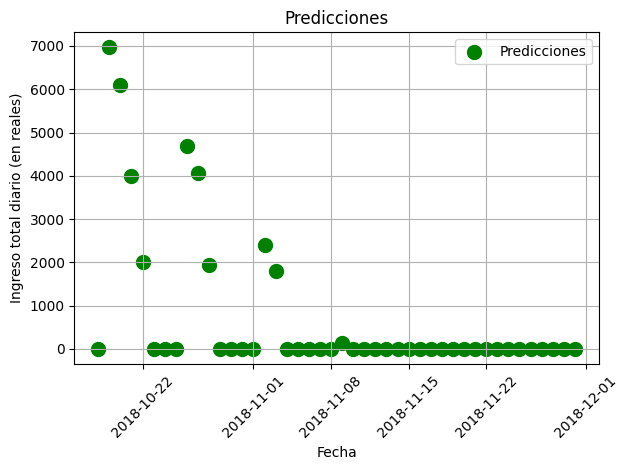

In [15]:
# Preparar datos para pronóstico
# Filtrar datos históricos hasta 2018-10-17
df_historico = df[df['date'] <= pd.to_datetime('2018-10-17').date()]
ventas_historico = df_historico.groupby('date')['payment_value'].sum().values

# Entrenar modelo SARIMA con datos históricos
model = SARIMAX(ventas_historico, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Predecir desde 2018-10-18 hasta 2018-11-30
fecha_inicio_pred = pd.to_datetime('2018-10-18')
fecha_fin_pred = pd.to_datetime('2018-11-30')
dias_pred = (fecha_fin_pred - fecha_inicio_pred).days + 1

forecast = model_fit.forecast(steps=dias_pred)# type: ignore
forecast = np.maximum(forecast, 0)
fechas_pred = pd.date_range(start=fecha_inicio_pred, periods=dias_pred, freq='D')

# Predicciones
plt.scatter(fechas_pred, forecast, label='Predicciones', color='green', s=100)

plt.title('Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ingreso total diario (en reales)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
max(ventas_historico)

np.float64(260462.36)

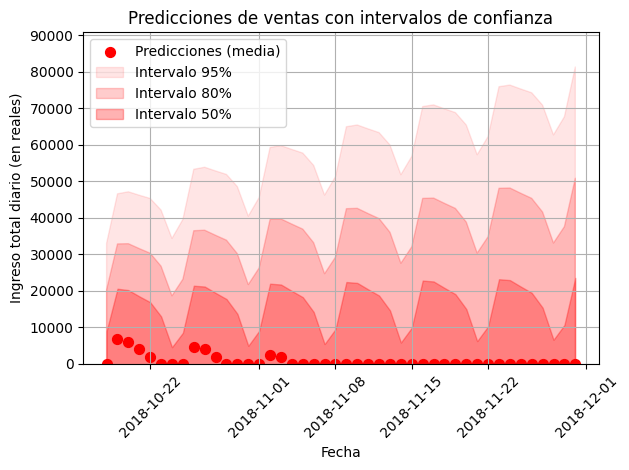

In [57]:
forecast_obj = model_fit.get_forecast(steps=dias_pred)  # type: ignore
forecast_prob = forecast_obj.predicted_mean
forecast_prob = np.maximum(forecast_prob, 0)

conf_int_50 = forecast_obj.conf_int(alpha=0.5) # 50% 
conf_int_80 = forecast_obj.conf_int(alpha=0.2) # 80% 
conf_int_95 = forecast_obj.conf_int(alpha=0.05) # 95%

plt.scatter(fechas_pred, forecast_prob, label='Predicciones (media)', color='red', s=50)
plt.fill_between(fechas_pred, conf_int_95[:, 0], conf_int_95[:, 1], color='red', alpha=0.1, label='Intervalo 95%') 
plt.fill_between(fechas_pred, conf_int_80[:, 0], conf_int_80[:, 1], color='red', alpha=0.2, label='Intervalo 80%') 
plt.fill_between(fechas_pred, conf_int_50[:, 0], conf_int_50[:, 1], color='red', alpha=0.3, label='Intervalo 50%')

plt.title('Predicciones de ventas con intervalos de confianza')
plt.xlabel('Fecha')
plt.ylabel('Ingreso total diario (en reales)')
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
y_ticks = np.arange(0, plt.ylim()[1] + 1, 10000)
plt.yticks(y_ticks)

plt.grid(True)
plt.tight_layout()
plt.show()

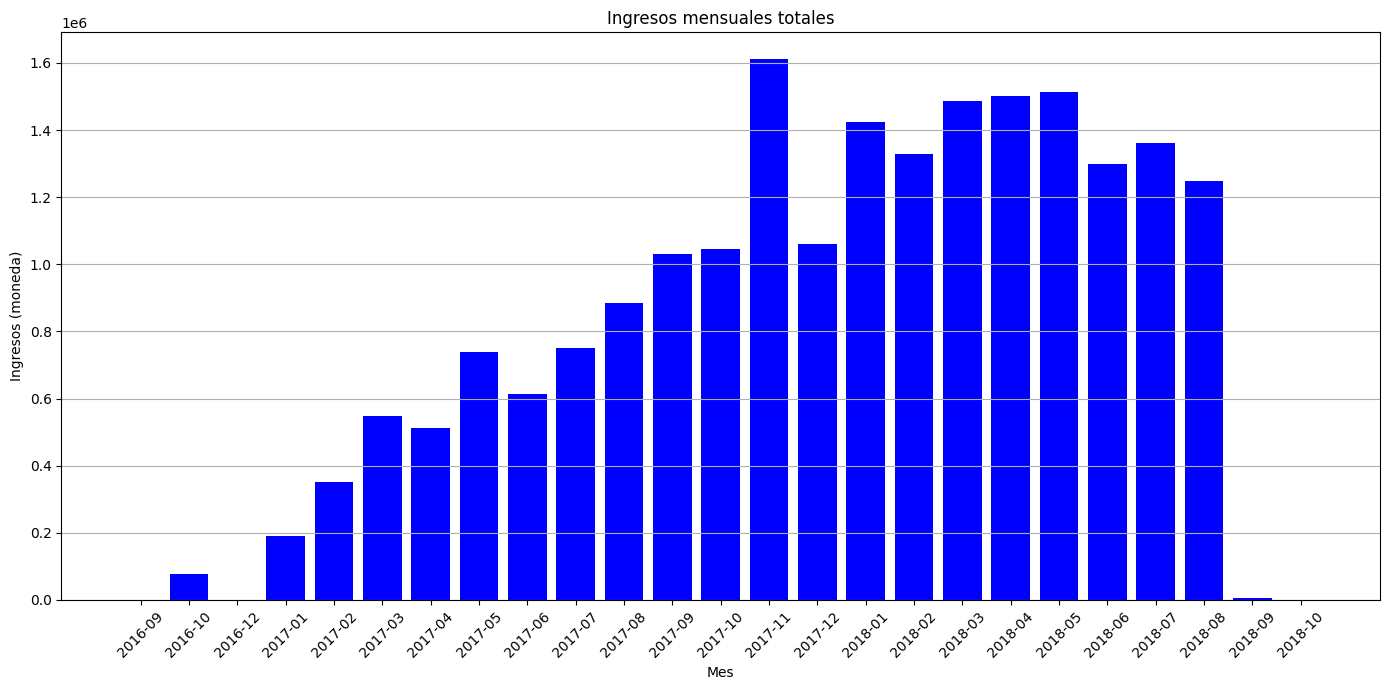

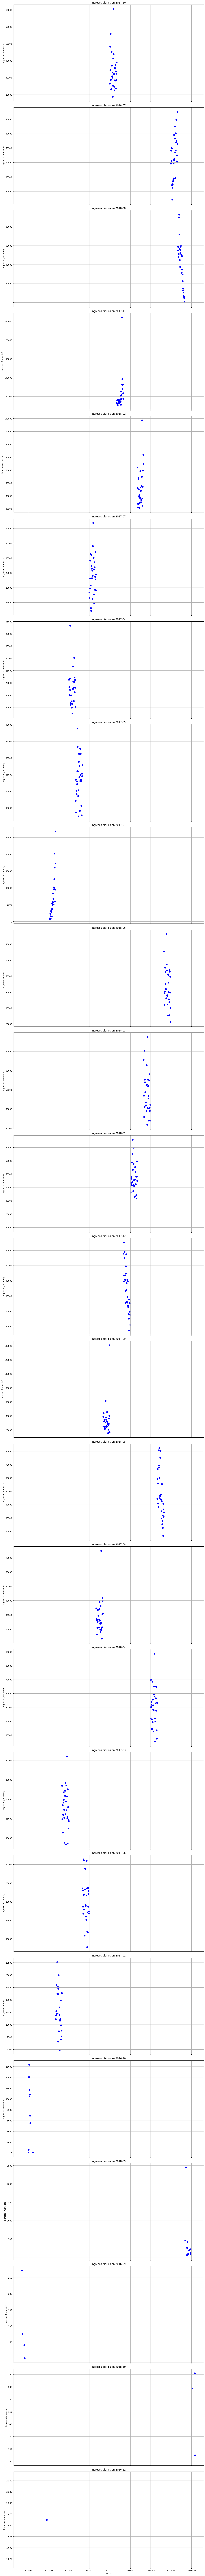

In [ ]:
ingresos_mensuales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum().reset_index() 

ingresos_mensuales['mes'] = ingresos_mensuales['order_purchase_timestamp'].astype(str)

plt.figure(figsize=(14, 7))
plt.bar(ingresos_mensuales['mes'], ingresos_mensuales['payment_value'], color='blue')
plt.title('Ingresos mensuales totales')
plt.xlabel('Mes')
plt.ylabel('Ingresos (moneda)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

meses = df['order_purchase_timestamp'].dt.to_period('M').unique()
fig, axes = plt.subplots(len(meses), 1, figsize=(14, 7 * len(meses)), sharex=True)

for i, mes in enumerate(meses):
    df_mes = df[df['order_purchase_timestamp'].dt.to_period('M') == mes]
    ingresos_diarios = df_mes.groupby('date')['payment_value'].sum()
    axes[i].scatter(ingresos_diarios.index, ingresos_diarios.values, color='blue', s=50)
    axes[i].set_title(f'Ingresos diarios en {mes}')
    axes[i].set_ylabel('Ingresos (moneda)')
    axes[i].grid(True)

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()



In [13]:
def predict_next_sale(product_id, sales_data): # Filtrar datos para el producto específico 
    product_sales = sales_data[sales_data['product_id'] == product_id].set_index('order_purchase_timestamp')['sales']
    if len(product_sales) < 10:  # Necesita al menos 10 puntos de datos para un modelo confiable
        return f"Datos insuficientes para {product_id} (solo {len(product_sales)} ventas)"
    # Verificar estacionariedad con Dickey-Fuller
    try:
        result = adfuller(product_sales)
        if result[1] > 0.05:  # Si no es estacionaria, diferenciar
            product_sales = product_sales.diff().dropna()
    except:
        pass

# Ajustar modelo SARIMA (parámetros básicos: p=1, d=1, q=1, P=1, D=1, Q=1, s=7 para estacionalidad semanal)
    try:
        model = SARIMAX(product_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        model_fit = model.fit(disp=False)
    
    # Pronosticar 1 paso adelante (próxima fecha)
        forecast = model_fit.forecast(steps=1) # type: ignore
        next_sale_date = pd.to_datetime(product_sales.index[-1]) + pd.Timedelta(days=1)
    
        return f"Producto {product_id}: Próxima venta el {next_sale_date.date()} con {forecast.iloc[0]:.2f} unidades"
    except Exception as e:
        return f"Error en modelo para {product_id}: {str(e)}"

unique_products = df['product_id'].dropna().unique() 
predictions = {}

sales_per_product = df.groupby(['product_id', 'order_purchase_timestamp']).size().reset_index(name='sales')

for pid in unique_products[:5]: predictions[pid] = predict_next_sale(pid, sales_per_product)

for pid, pred in predictions.items(): print(pred)

Datos insuficientes para 87285b34884572647811a353c7ac498a (solo 4 ventas)
Producto 595fac2a385ac33a80bd5114aec74eb8: Próxima venta el 2018-08-24 con 1.26 unidades
Datos insuficientes para aa4383b373c6aca5d8797843e5594415 (solo 3 ventas)
Datos insuficientes para d0b61bfb1de832b15ba9d266ca96e5b0 (solo 4 ventas)
Producto 65266b2da20d04dbe00c5c2d3bb7859e: Próxima venta el 2018-07-25 con 1.05 unidades
